# Fourier interpolation using FFT

In [82]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

from numpy import pi,zeros,arange,exp,sin,abs,linspace,dot,outer,real,mod,log
from numpy.fft import fft
import matplotlib.pyplot as plt

The following function computes the trigonometric interpolant and plots it.

In [83]:
# Wave numbers are arranged as k=[0,1,...,N/2,-N/2+1,-N/2,...,-1]
def fourier_interp(N,f,ne=500,fig=True):
    if mod(N,2) != 0:
        print("N must be even")
        return
    h = 2*pi/N; x = h*arange(0,N);
    v = f(x);
    v_hat = fft(v)
    k = zeros(N)
    n = int(N/2)
    k[0:n+1] = arange(0,n+1)
    k[n+1:] = arange(-n+1,0,1)

    xx = linspace(0.0,2*pi,ne)
    vf = real(dot(exp(1j*outer(xx,k)), v_hat)/N)
    ve = f(xx)

    # Plot interpolant and exact function
    if fig:
        plt.plot(x,v,'o',xx,vf,xx,ve)
        plt.legend(('Data','Fourier','Exact'))
        plt.title("N = "+str(N))

    error = abs(vf-ve).max()
    print("Max error = ",error)
    return error

## Infintely smooth, periodic function

Max error =  8.01581023779363e-14


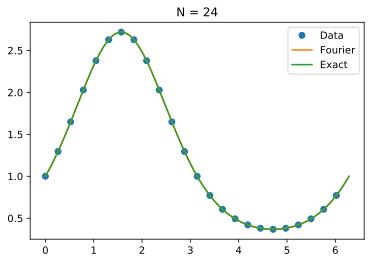

In [84]:
f1 = lambda x: exp(sin(x))
fourier_interp(24,f1);

## Infinitely smooth, derivative not periodic

Max error =  0.024794983262922784


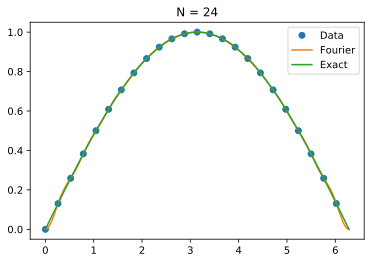

In [85]:
g = lambda x: sin(x/2)
e1 = fourier_interp(24,g)

In [86]:
e2 = fourier_interp(48,g,fig=False)
print("Rate = ", log(e1/e2)/log(2))

Max error =  0.012409450043334486
Rate =  0.9986090713584319


## Continuous function

Max error =  0.03195085708656353


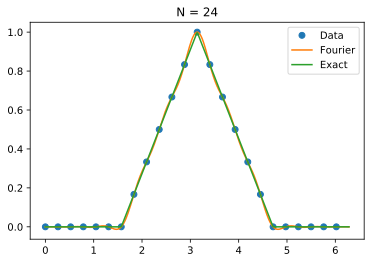

In [87]:
def trihat(x):
    f = 0*x
    for i in range(len(x)):
        if x[i] < 0.5*pi or x[i] > 1.5*pi:
            f[i] = 0.0
        elif x[i] >= 0.5*pi and x[i] <= pi:
            f[i] = 2*x[i]/pi - 1
        else:
            f[i] = 3 - 2*x[i]/pi
    return f
    
e1 = fourier_interp(24,trihat)

In [88]:
e2 = fourier_interp(48,trihat,fig=False)
print("Rate = ", log(e1/e2)/log(2))

Max error =  0.015806700636915583
Rate =  1.0153183695992953


## Discontinuous function

Max error =  0.9915112319641801


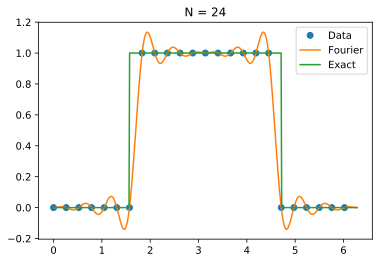

In [89]:
f2 = lambda x: (abs(x-pi) < 0.5*pi)
e1 = fourier_interp(24,f2)

Max error =  0.9828401566916884
Rate =  0.0126723113206373


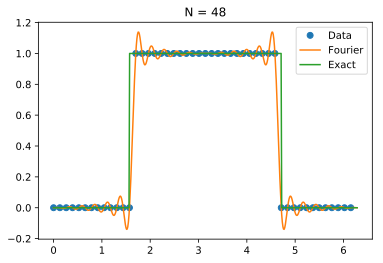

In [90]:
e2 = fourier_interp(48,f2)
print("Rate = ", log(e1/e2)/log(2))